# Back Propagation

This page will explain how back propagation is working in deep learning with a very
[simple example](
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#warm-up-numpy
) provided in pytorch tutorial.

## The goal
Fit a 3rd order polynomial function to a sine function.

Fitting function

$ y_{apx} = a + bx + cx^2 + dx^3 $

Target function

$ y_{target} = \sin(x) $

We are going to use back propagation to find the best set of values for $a, b, c, d$
that makes the fitting function well approximate the target function.


## Mathematical derivation
First we need to define a loss that represent how far our approximation is from the
target values. Here we use squared difference or $L_2$ loss in a sophisticated term.

$Loss = (y_{apx} - y_{target})^2$         (1)

Our aim is to make the $Loss$ as small as possible. (Given the same x,) $y_{target}$ is
fixed. What we can tune is $y_{apx}$ by changing the values of $a, b, c, d$.

In other words, we want to minimize $Loss$ respect to $a, b, c, d$ respectively.
To find the minimum point of a certain function, the standard approach is to take a
derivative. That is to say, to find the minimum value of $Loss$ respect to $a$, we take
 the derivative of $Loss$ respect to $a$: $\frac{\partial Loss}{\partial a}$

How to compute this? We use [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to
 brake it down.

$\frac{\partial Loss}{\partial a} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial y_{apx}}{\partial a} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial (a + bx + cx^2 +
dx^3)}{\partial a}$

In the right most part, only $a$ is variable and everything else is constant.
So
$\frac{\partial (a + bx + cx^2 + dx^3)}{\partial a} =
\frac{\partial a}{\partial a} + \frac{\partial (bx + cx^2 + dx^3)}{\partial a} =
1 + 0$

Therefore,

$\frac{\partial Loss}{\partial a} =
\frac{\partial Loss}{\partial y_{apx}} \cdot (1 + 0) =
\frac{\partial Loss}{\partial y_{apx}}$


Likewise, we can take the derivative of $Loss$ respect to $b$ like this

$\frac{\partial Loss}{\partial b} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial y_{apx}}{\partial b} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial (a + bx + cx^2 +
dx^3)}{\partial b}$

$\frac{\partial Loss}{\partial b} =
\frac{\partial Loss}{\partial y_{apx}} \cdot (\frac{x \partial b}{\partial b} +
\frac{\partial (a + cx^2 + dx^3)}{\partial b}) =
\frac{\partial Loss}{\partial y_{apx}} \cdot (x + 0)$

$\frac{\partial Loss}{\partial b} = \frac{\partial Loss}{\partial y_{apx}}x$

We repeat this process for $c$ and $d$...

$\frac{\partial Loss}{\partial c} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial y_{apx}}{\partial c} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial (a + bx + cx^2 +
dx^3)}{\partial c}$

$\frac{\partial Loss}{\partial c} =
\frac{\partial Loss}{\partial y_{apx}} \cdot (\frac{x^2 \partial c}{\partial c} +
\frac{\partial (a + bx + dx^3)}{\partial c}) =
\frac{\partial Loss}{\partial y_{apx}} \cdot (x^2 + 0) = \frac{\partial
Loss}{\partial y_{apx}}x^2$

$\frac{\partial Loss}{\partial d} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial y_{apx}}{\partial d} =
\frac{\partial Loss}{\partial y_{apx}} \cdot \frac{\partial (a + bx + cx^2 +
dx^3)}{\partial d}$

$\frac{\partial Loss}{\partial d} =
\frac{\partial Loss}{\partial y_{apx}} \cdot (\frac{x^3 \partial d}{\partial d} +
\frac{\partial (a + bx + cx^2)}{\partial d}) =
\frac{\partial Loss}{\partial y_{apx}} \cdot (x^3 + 0) = \frac{\partial
Loss}{\partial y_{apx}}x^3$

In summary, here are we have got so far.

$\frac{\partial Loss}{\partial a} = \frac{\partial Loss}{\partial y_{apx}}$  (2)

$\frac{\partial Loss}{\partial b} = \frac{\partial Loss}{\partial y_{apx}}x$  (3)

$\frac{\partial Loss}{\partial c} = \frac{\partial Loss}{\partial y_{apx}}x^2$  (4)

$\frac{\partial Loss}{\partial d} = \frac{\partial Loss}{\partial y_{apx}}x^3$  (5)

The one last derivative can be obtained by taking derivative of formula (1) respect
to $y_{apx}$.

$\frac{\partial Loss}{\partial y_{apx}} = 2(y_{apx} - y_{target})$

Plugging this into (2) - (5), we get

$\frac{\partial Loss}{\partial a} = 2(y_{apx} - y_{target})$

$\frac{\partial Loss}{\partial b} = 2(y_{apx} - y_{target})x$

$\frac{\partial Loss}{\partial c} = 2(y_{apx} - y_{target})x^2$

$\frac{\partial Loss}{\partial d} = 2(y_{apx} - y_{target})x^3$

Now we have obtained the gradients for $a, b, c, d$ in a form that we can compute
with given $x$ and $y_{target}$.

The rest part is easy. We just need to nudge $a, b, c, d$ by the amount of each
gradient iteratively, and the $Loss$ will converge to the minimum. We are sure that
the $Loss$ will converge because the loss function (1) is a convex function and has
minimum. Because (2) - (5) are all depend on $\frac{\partial Loss}{\partial
y_{apx}}$, they should converge too.


## Numpy implementation
Now let's try with numpy implementation.

99 1231.9478939097044
199 874.1883858525014
299 621.0846272739334
399 442.014047309205
499 315.3200178713387
599 225.68165579590803
699 162.26006246954861
799 117.38702163620324
899 85.63739410990607
999 63.17292091497713
1099 47.278012846638944
1199 36.031349190034994
1299 28.07354874885737
1399 22.44280462524747
1499 18.458599141922324
1599 15.639433165742478
1699 13.644619443795406
1799 12.233100693681479
1899 11.234312526041535
1999 10.527568087818217
Result: y = -0.04375717370722012 + 0.8579187425298972 x + 0.007548840587008845 x^2 + -0.0934979349809922 x^3


<ipython-input-1-f938e3339373>:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


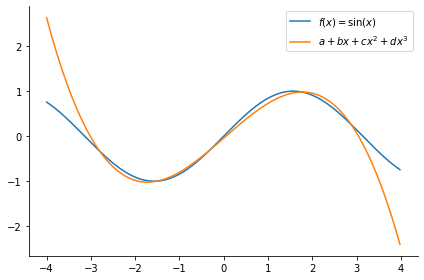

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)


def fn_3poly(x, a, b, c, d):
    return a + b * x + c * x ** 2 + d * x ** 3


# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = fn_3poly(x, a, b, c, d)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


x_plot = np.arange(-4, 4, 0.02)
fig, ax = plt.subplots(1)
ax.plot(x_plot, np.sin(x_plot))
ax.plot(x_plot, fn_3poly(x_plot, a, b, c, d))
ax.legend([r'$f(x)=\sin(x)$', r'$a + bx + cx^2 + dx^3$'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.show()